# import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [4]:
data = pd.read_csv("/content/car_price_prediction.csv")

# Explore data

In [5]:
data.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [6]:
data.shape

(19237, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19232,False
19233,False
19234,False
19235,False


In [10]:
data.duplicated().sum()

313

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(18924, 18)

In [14]:
data.isnull()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [16]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [17]:
for i in data.columns:
  print(i," : ",data[i].nunique())

ID  :  18924
Price  :  2315
Levy  :  559
Manufacturer  :  65
Model  :  1590
Prod. year  :  54
Category  :  11
Leather interior  :  2
Fuel type  :  7
Engine volume  :  107
Mileage  :  7687
Cylinders  :  13
Gear box type  :  4
Drive wheels  :  3
Doors  :  3
Wheel  :  2
Color  :  16
Airbags  :  17


In [18]:
pd.DataFrame(data.nunique())

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107


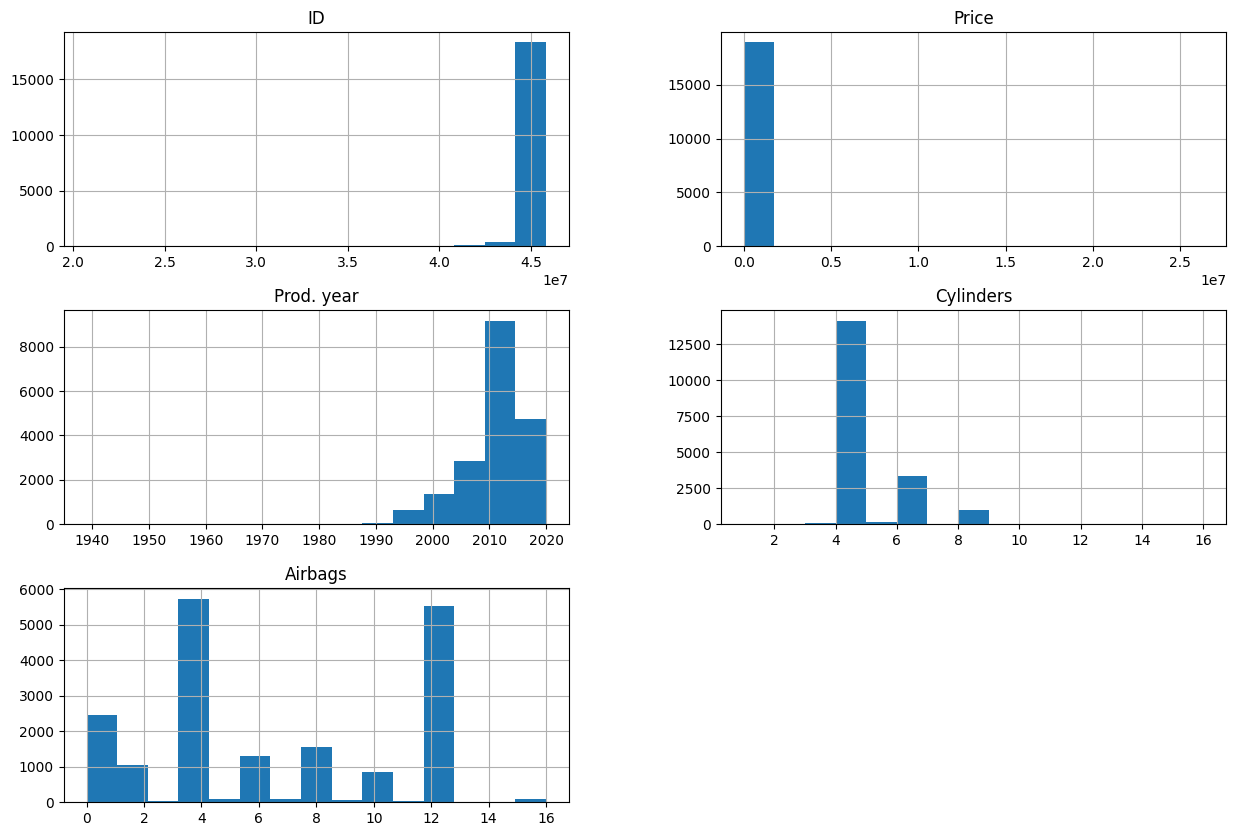

In [19]:
data.hist(bins=15,figsize=(15,10))
plt.show()

In [20]:
top_10_cars = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top_10_cars

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


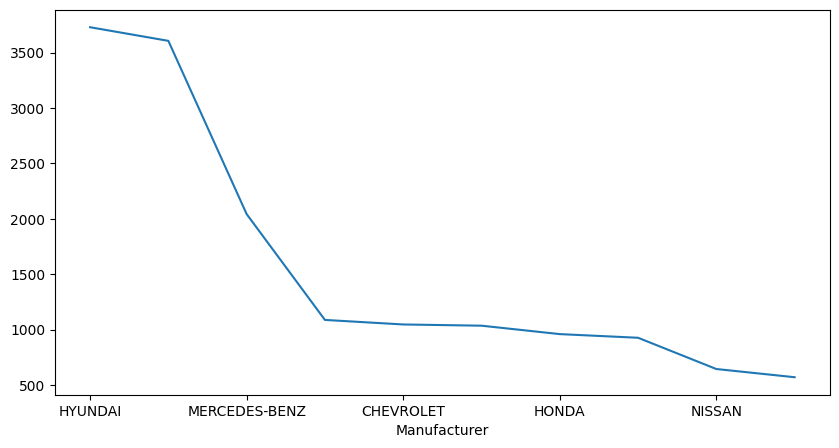

In [21]:
top_10_cars.plot(figsize=(10,5))
plt.show()

In [22]:
top10_mean_prices = [data[data['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]
top10_mean_prices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

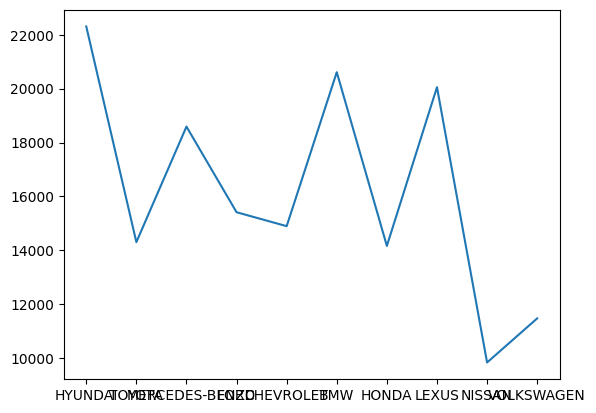

In [23]:
plt.plot(top_10_cars.index,top10_mean_prices)
plt.show()

In [24]:
object_data = data.select_dtypes(include='object')

In [25]:
object_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


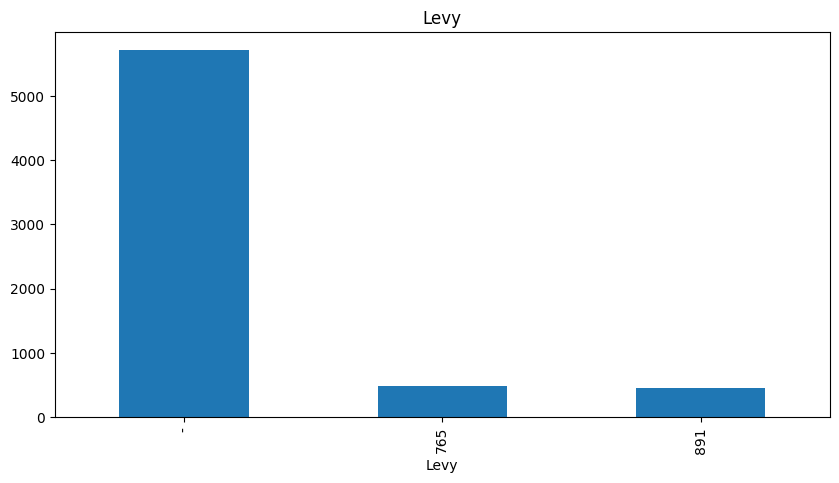

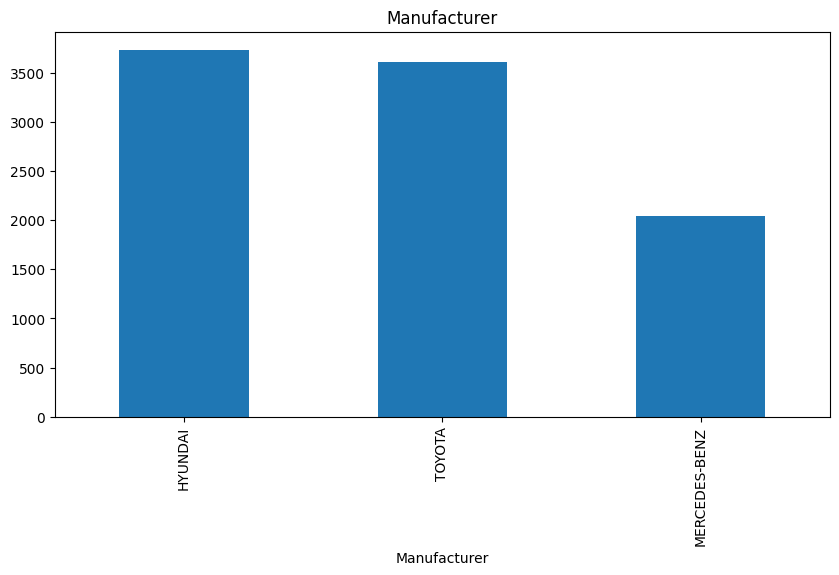

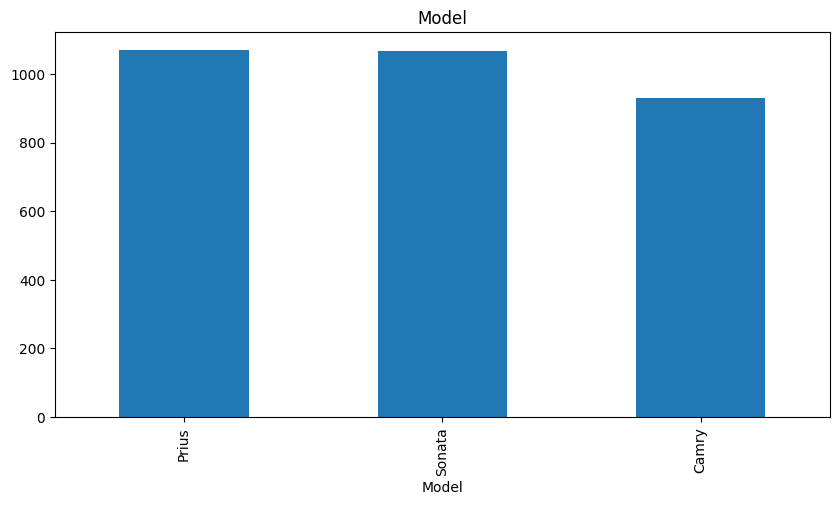

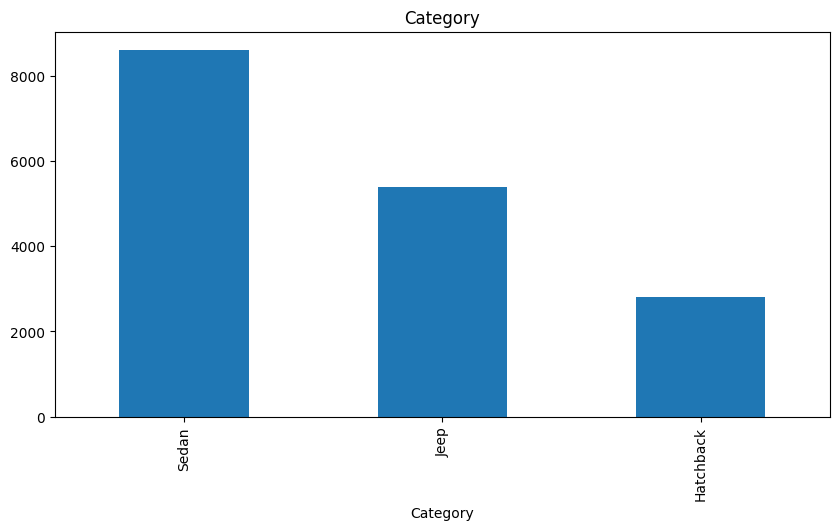

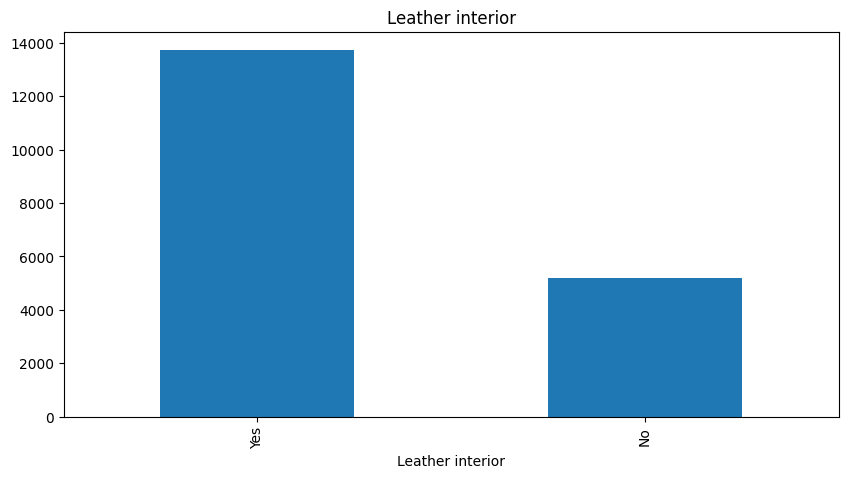

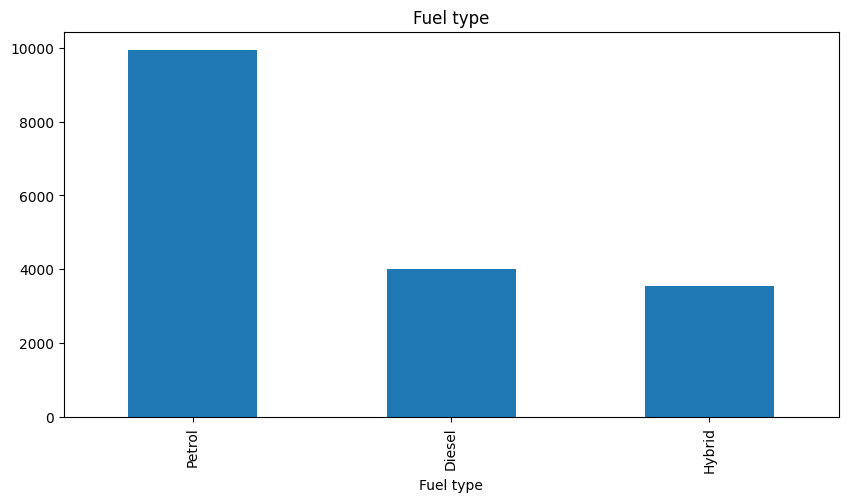

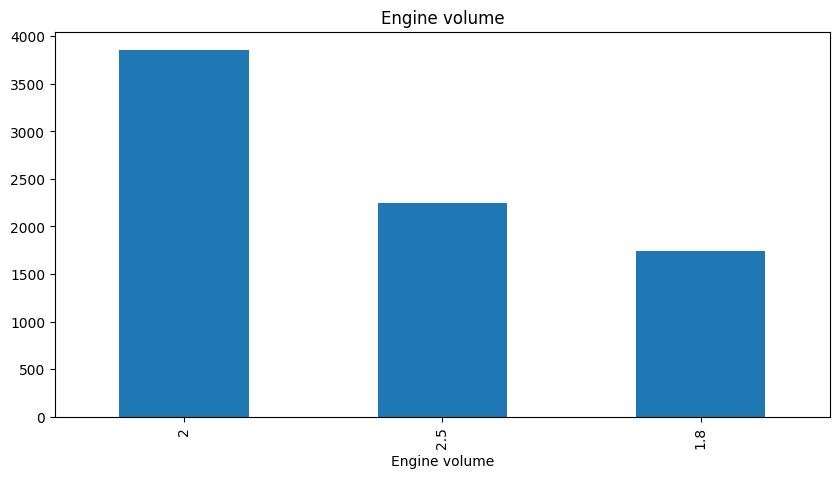

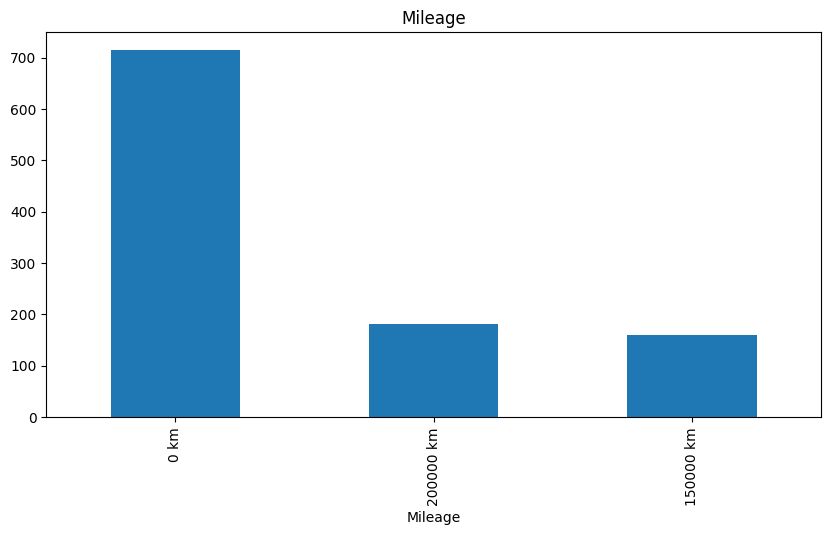

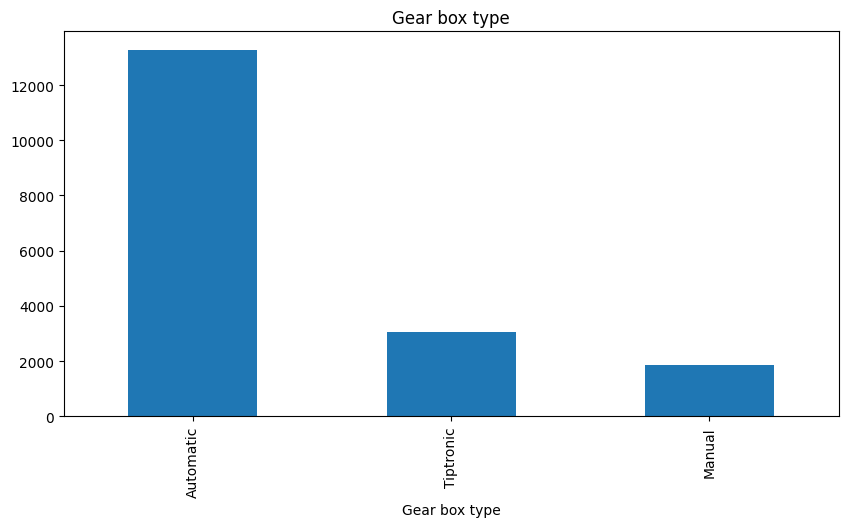

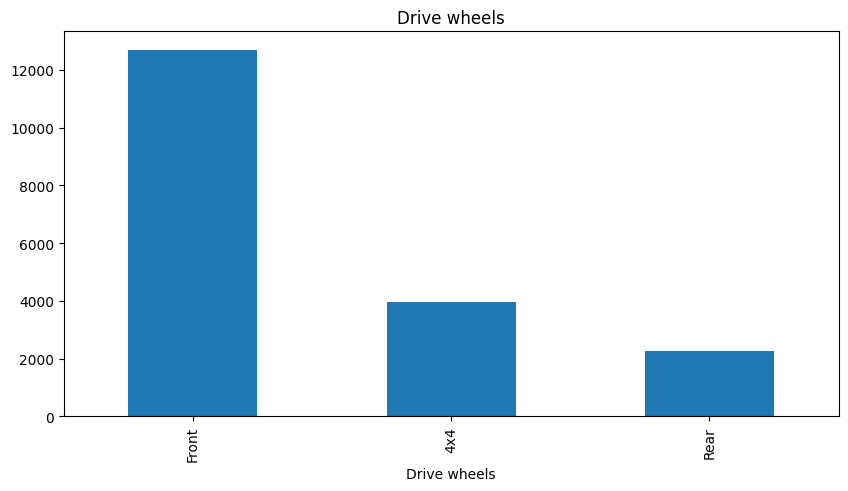

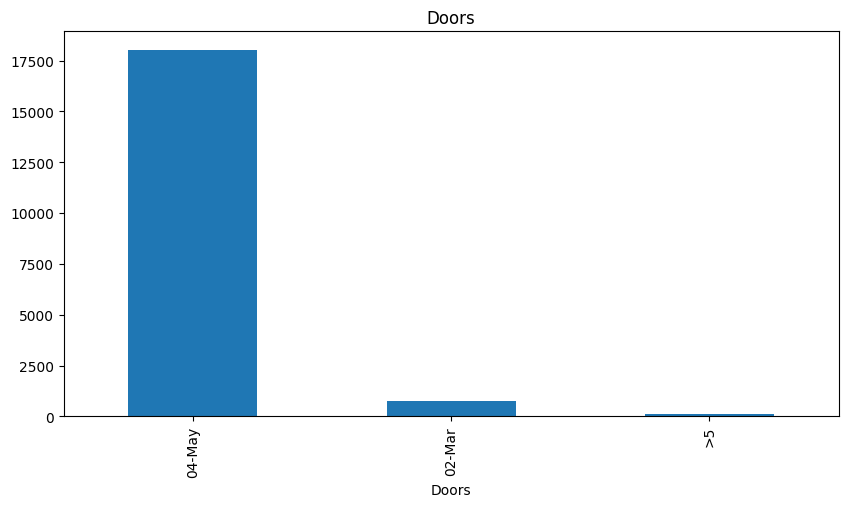

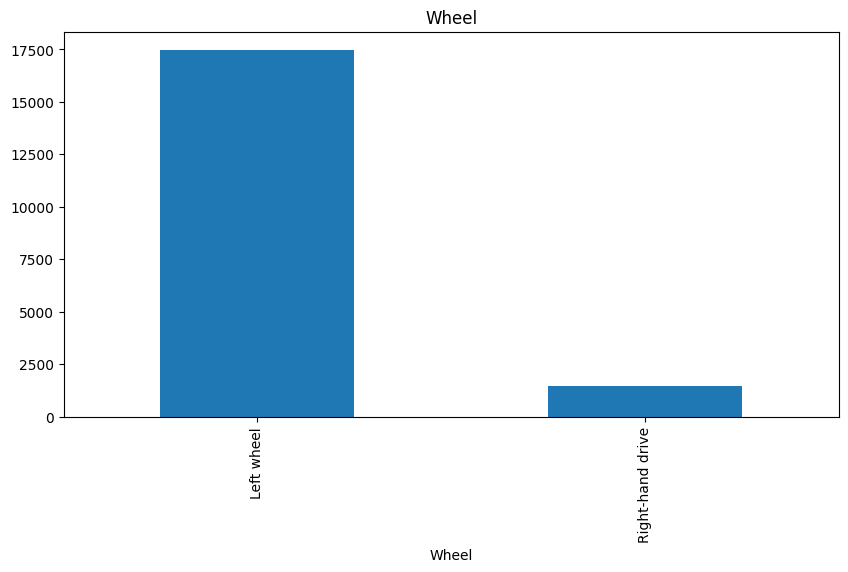

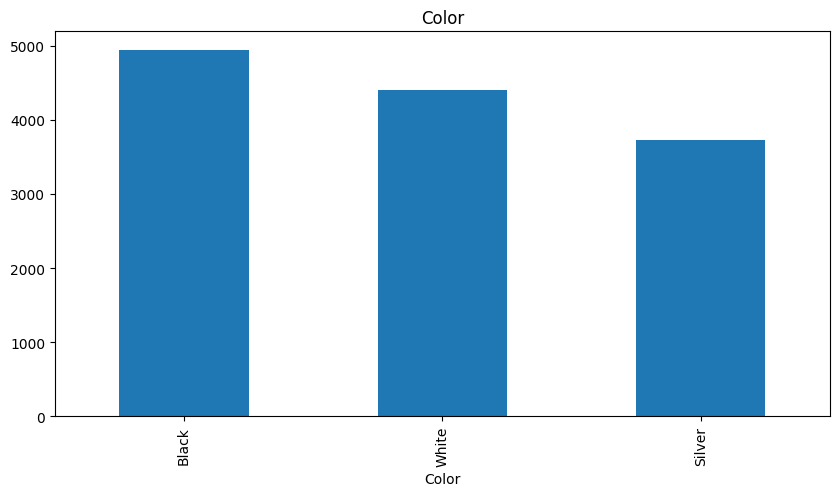

In [26]:
for i in object_data.columns:
  plt.figure(figsize=(10,5))
  top10 = data[i].value_counts()[:3]
  top10.plot(kind='bar')
  plt.title(i)
  plt.show()


#  Data Processing"

In [27]:
data = data.drop(['ID','Doors'],axis=1)

In [28]:
data.shape

(18924, 16)

# Date Column

In [29]:
import datetime

In [30]:
dtime = datetime.datetime.now()

In [31]:
data['Car_age'] = dtime.year - data['Prod. year']

data = data.drop('Prod. year',axis=1)

# Levy Column


In [32]:
data.Levy.replace('-',0,inplace=True)

# data['Levy'] = data['Levy'].astype(int)

In [33]:
data.Levy.value_counts()

,count
Levy,
0,5709
765,482
891,453
639,403
640,398
...,...
3156,1
2908,1
1279,1


# Mileage column

In [34]:
data['Mileage'] = data['Mileage'].str.replace('km','')

# Engine volume Column

In [35]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')
data['Engine volume'] = data['Engine volume'].astype(float)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Car_age           18924 non-null  int64  
dtypes: float64(2), int64(3), object(11)
memory us

# Detect Outliers"

In [37]:
data_numeric = data.select_dtypes(exclude='object')

In [38]:
for col in data_numeric :
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = ((data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)).sum()
  total = data_numeric[col].shape[0]
  print(f"Total Outliers in {col} are : {outliers}-{round(100*(outliers)/total,2)} %")

  if outliers > 0:
    data = data.loc[(data[col] <= upper_bound) & (data[col] >= lower_bound)]

Total Outliers in Price are : 1055-5.57 %
Total Outliers in Engine volume are : 1358-7.18 %
Total Outliers in Cylinders are : 4765-25.18 %
Total Outliers in Airbags are : 0-0.0 %
Total Outliers in Car_age are : 1777-9.39 %


# Transform Data

In [39]:
dobject = data.select_dtypes(include='object')
dnumeric = data.select_dtypes(exclude='object')

In [40]:
le = LabelEncoder()

In [41]:
for i in dobject.columns:
  dobject[i] = le.fit_transform(dobject[i].astype(str))

In [42]:
data = pd.concat([dobject,dnumeric],axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12261 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              12261 non-null  int64  
 1   Manufacturer      12261 non-null  int64  
 2   Model             12261 non-null  int64  
 3   Category          12261 non-null  int64  
 4   Leather interior  12261 non-null  int64  
 5   Fuel type         12261 non-null  int64  
 6   Mileage           12261 non-null  int64  
 7   Gear box type     12261 non-null  int64  
 8   Drive wheels      12261 non-null  int64  
 9   Wheel             12261 non-null  int64  
 10  Color             12261 non-null  int64  
 11  Price             12261 non-null  int64  
 12  Engine volume     12261 non-null  float64
 13  Cylinders         12261 non-null  float64
 14  Airbags           12261 non-null  int64  
 15  Car_age           12261 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.6 MB

In [44]:
cor = data.corr()

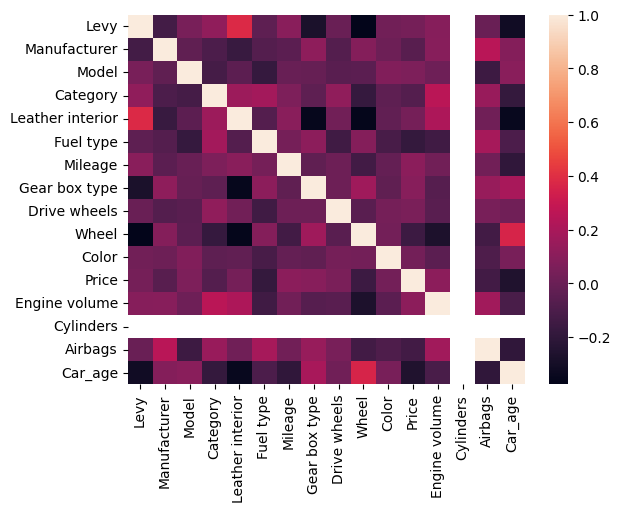

In [45]:
sns.heatmap(cor)
plt.show()

# Model

In [46]:
X = data.drop('Price',axis=1)
y = data['Price']

In [47]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [48]:
algorithms = ['LinearRegression', 'DecisionTreeRegressor' , 'RandomForestRegressor' ,
              'GradientBoostingRegressor', 'XGBRegressor' , 'SVR']
Accuracy1 = []
Accuracy2 = []

In [49]:
def models(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy1 = r2_score(y_test,y_pred)
  accuracy2 = np.sqrt(mean_squared_error(y_test, y_pred))
  Accuracy1.append(accuracy1)
  Accuracy2.append(accuracy2)
  score = model.score(x_test,y_test)
  print(f"The Score Model is : {score}")

In [50]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = XGBRegressor()
model6 = SVR()

In [51]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

The Score Model is : 0.20449080889875626
The Score Model is : 0.5535668663263043
The Score Model is : 0.7736038293789457
The Score Model is : 0.6648417568136129
The Score Model is : 0.754316508769989
The Score Model is : -0.0031340668292982876


In [52]:
df = pd.DataFrame({'Algorithms':algorithms,"Accuracy1":Accuracy1,"Accuracy2":Accuracy2})
df

,Algorithms,Accuracy1,Accuracy2
0,LinearRegression,0.204491,10026.406274
1,DecisionTreeRegressor,0.553567,7511.054401
2,RandomForestRegressor,0.773604,5348.810797
3,GradientBoostingRegressor,0.664842,6508.001587
4,XGBRegressor,0.754317,5571.994795
5,SVR,-0.003134,11259.061394


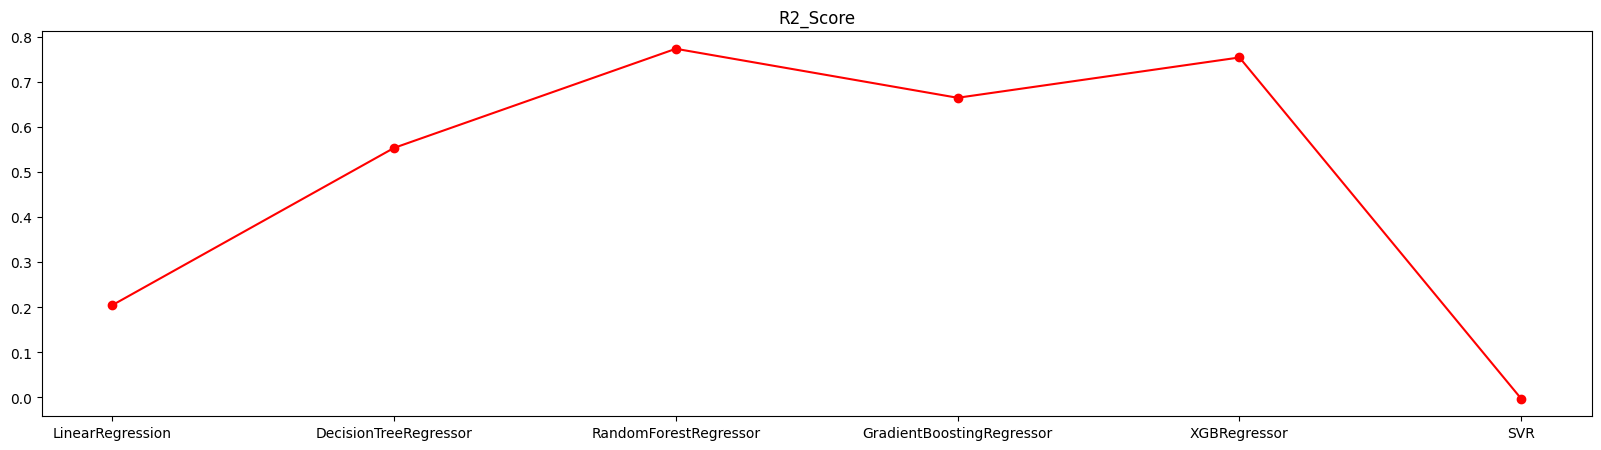

In [53]:
fig , ax  = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,df.Accuracy1,c='red',marker='o')
plt.title('R2_Score')
plt.show()

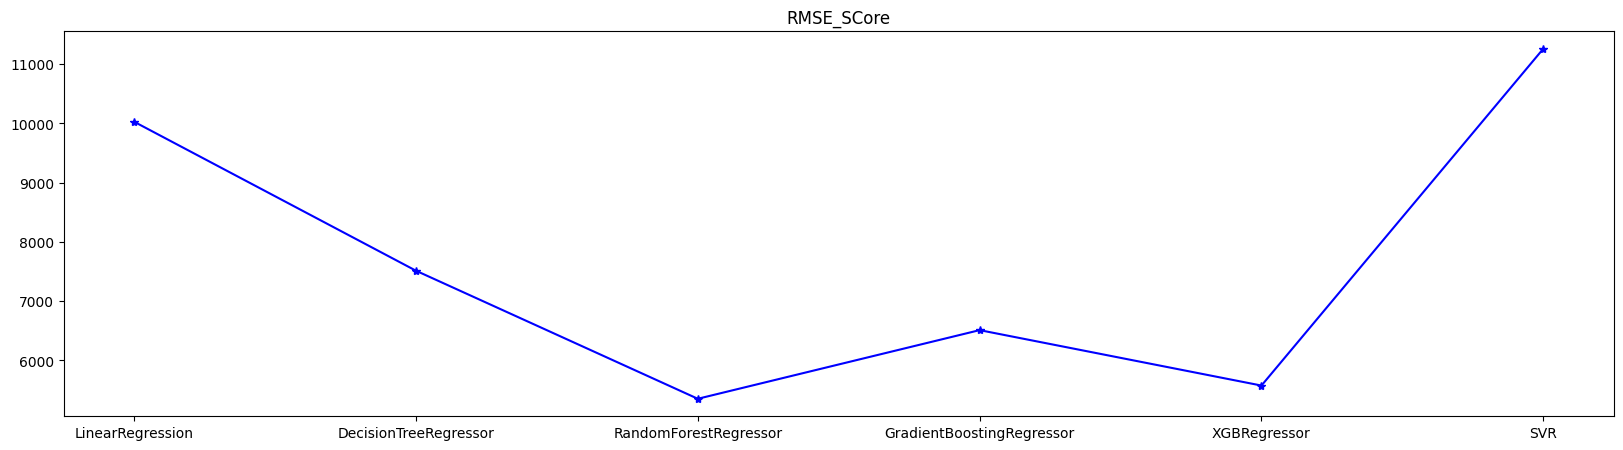

In [54]:
fig , ax  = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,df.Accuracy2,c='blue',marker='*')
plt.title('RMSE_SCore')
plt.show()

# Using My Model To Predict New Data

In [55]:
import pickle

In [56]:
file_name = "model.pkl"

In [57]:
pickle.dump(model2,open(file_name,'wb'))

In [59]:
file_name1 = "model1.sav"

In [60]:
pickle.dump(model2,open(file_name1,'wb'))